In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## 1. Loading the Data

### 1.1 Rent Price Summary Data

In [2]:
Rent_Prices = pd.read_pickle('RentPrices')
Rent_Prices.head()

,Postal_Code,Unit_Type,Address,Cost,Home_Type,Bedroom_Num,Bathroom_Num,Area_SqFt,Neighborhood
68,11378.0,Apartment for rent,"6155 60th Pl, Maspeth, NY 11378",2650.0,APARTMENT,3.0,1.0,1375.0,Sunnyside/Woodside
80,11361.0,House for rent,"217th St, Bayside, NY 11361",1250.0,HOUSE- SINGLE FAMILY,0.0,1.0,550.0,Bayside/Little Neck
87,10001.0,Apartment for rent,"247 W 26th St APT 5B, New York, NY 10001",2500.0,HOUSE- MULTI FAMILY,1.0,1.0,500.0,Chelsea/Clinton/Midtown
93,10001.0,Apartment for rent,"358 W 30th St APT 2B, New York, NY 10001",2350.0,HOUSE- MULTI FAMILY,0.0,1.0,NaN,Chelsea/Clinton/Midtown
95,10001.0,Apartment for rent,"420 W 25th St APT 7K, New York, NY 10001",5900.0,HOUSE- MULTI FAMILY,1.0,1.0,893.0,Chelsea/Clinton/Midtown


In [3]:
Rent_Prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5323 entries, 68 to 6873
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Postal_Code   5323 non-null   float64
 1   Unit_Type     5323 non-null   object 
 2   Address       5323 non-null   object 
 3   Cost          5323 non-null   float64
 4   Home_Type     5323 non-null   object 
 5   Bedroom_Num   5323 non-null   float64
 6   Bathroom_Num  5252 non-null   float64
 7   Area_SqFt     2767 non-null   float64
 8   Neighborhood  5147 non-null   object 
dtypes: float64(5), object(4)
memory usage: 415.9+ KB


### 1.2 Neighborhood Summary Data

In [4]:
Neighborhood = pd.read_pickle('Neighborhood')
Neighborhood.head()

,Neighborhood,boro_names,median_rent,median_income,car_free_commute,population_density,poverty_rate,crime,subway,park,income_diversity_ratio,labor_force_rate
0,Astoria,Queens,2125.10,50605.87,0.78,33.83,0.17,2.974474,0.73,0.63,4.92,0.68
1,Bay Ridge,Brooklyn,1678.72,50795.57,0.65,32.86,0.15,1.856024,0.74,0.60,5.17,0.62
2,Bayside/Little Neck,Queens,1962.32,61084.74,0.34,12.87,0.07,1.088525,0.21,0.69,4.25,0.63
3,Bedford Stuyvesant,Brooklyn,2288.53,30129.29,0.79,60.33,0.32,7.772004,0.88,0.94,6.77,0.61
4,Bensonhurst,Brooklyn,1496.61,39280.36,0.69,49.38,0.17,1.511147,0.87,0.46,5.19,0.58


In [86]:
Neighborhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            55 non-null     object 
 1   boro_names              55 non-null     object 
 2   median_rent             55 non-null     float64
 3   median_income           55 non-null     float64
 4   car_free_commute        55 non-null     float64
 5   population_density      55 non-null     float64
 6   poverty_rate            55 non-null     float64
 7   crime                   55 non-null     float64
 8   subway                  55 non-null     float64
 9   park                    55 non-null     float64
 10  income_diversity_ratio  55 non-null     float64
 11  labor_force_rate        55 non-null     float64
dtypes: float64(10), object(2)
memory usage: 5.3+ KB


------------

## 2. Exploring the Data

In [12]:
df = pd.read_pickle('df')
df.head()

,Postal_Code,Unit_Type,Address,Cost,Home_Type,Bedroom_Num,Bathroom_Num,Area_SqFt,Neighborhood,boro_names,median_rent,median_income,car_free_commute,population_density,poverty_rate,crime,subway,park,income_diversity_ratio,labor_force_rate
0,11378.0,Apartment for rent,"6155 60th Pl, Maspeth, NY 11378",2650.0,APARTMENT,3.0,1.0,1375.0,Sunnyside/Woodside,Queens,2543.07,54870.01,0.78,22.53,0.14,1.766784,0.89,0.79,4.07,0.67
1,11361.0,House for rent,"217th St, Bayside, NY 11361",1250.0,HOUSE- SINGLE FAMILY,0.0,1.0,550.0,Bayside/Little Neck,Queens,1962.32,61084.74,0.34,12.87,0.07,1.088525,0.21,0.69,4.25,0.63
2,10001.0,Apartment for rent,"247 W 26th St APT 5B, New York, NY 10001",2500.0,HOUSE- MULTI FAMILY,1.0,1.0,500.0,Chelsea/Clinton/Midtown,Manhattan,3545.57,82393.55,0.89,47.01,0.13,4.959078,0.97,0.71,7.32,0.76
3,10001.0,Apartment for rent,"358 W 30th St APT 2B, New York, NY 10001",2350.0,HOUSE- MULTI FAMILY,0.0,1.0,NaN,Chelsea/Clinton/Midtown,Manhattan,3545.57,82393.55,0.89,47.01,0.13,4.959078,0.97,0.71,7.32,0.76
4,10001.0,Apartment for rent,"420 W 25th St APT 7K, New York, NY 10001",5900.0,HOUSE- MULTI FAMILY,1.0,1.0,893.0,Chelsea/Clinton/Midtown,Manhattan,3545.57,82393.55,0.89,47.01,0.13,4.959078,0.97,0.71,7.32,0.76


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5140 entries, 0 to 5322
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Postal_Code             5140 non-null   float64
 1   Unit_Type               5140 non-null   object 
 2   Address                 5140 non-null   object 
 3   Cost                    5140 non-null   float64
 4   Home_Type               5140 non-null   object 
 5   Bedroom_Num             5140 non-null   float64
 6   Bathroom_Num            5071 non-null   float64
 7   Area_SqFt               2652 non-null   float64
 8   Neighborhood            5140 non-null   object 
 9   boro_names              5140 non-null   object 
 10  median_rent             5140 non-null   float64
 11  median_income           5140 non-null   float64
 12  car_free_commute        5140 non-null   float64
 13  population_density      5140 non-null   float64
 14  poverty_rate            5140 non-null   

### 2A.) Exploring Distribution of  Rent Per Neighborhood - Zillow DataFrame

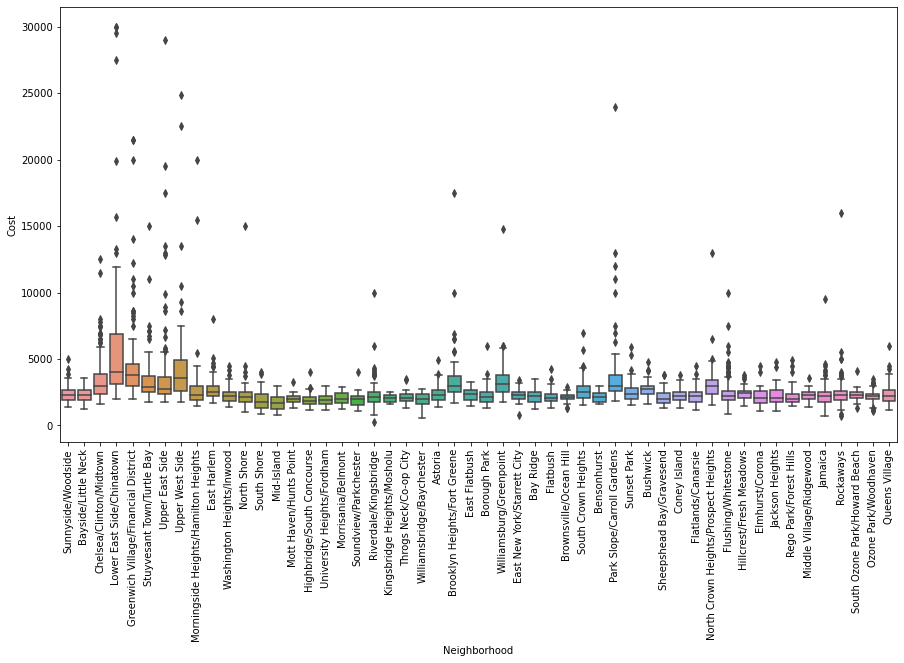

In [17]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x="Neighborhood", y="Cost", data=df)
_ = plt.xticks(rotation='vertical')

### 2B.) Exploring Distribution of Data - Department of Housing

#### 2.1 Median Rent per Sub-borough

In [19]:
Median_Rent = Neighborhood.sort_values(['median_rent'],ascending=False)
Median_Rent.head(7)

,Neighborhood,boro_names,median_rent,median_income,car_free_commute,population_density,poverty_rate,crime,subway,park,income_diversity_ratio,labor_force_rate
19,Greenwich Village/Financial District,Manhattan,3636.47,107335.10,0.87,51.86,0.09,4.289520,1.00,0.99,6.03,0.75
10,Chelsea/Clinton/Midtown,Manhattan,3545.57,82393.55,0.89,47.01,0.13,4.959078,0.97,0.71,7.32,0.76
45,Stuyvesant Town/Turtle Bay,Manhattan,3160.69,98690.94,0.87,89.63,0.08,2.060868,0.95,0.91,5.21,0.74
51,Upper West Side,Manhattan,3112.78,81872.27,0.86,67.05,0.10,2.124726,0.99,0.99,7.54,0.71
54,Williamsburg/Greenpoint,Brooklyn,2928.24,46342.67,0.83,36.65,0.28,3.443435,0.92,0.89,6.62,0.65
25,Lower East Side/Chinatown,Manhattan,2878.79,37683.53,0.88,93.78,0.26,3.735982,0.86,1.00,7.78,0.60
6,Brooklyn Heights/Fort Greene,Brooklyn,2842.83,60055.75,0.86,41.00,0.19,6.828606,0.94,0.97,6.90,0.68


- The majority of high rent prices are in Manhattan; which is not suprising due to the high demand and high population density
- These Neighborhoods have a low poverty rate, and the majority are near a park
- Majority also have a car free commute

#### 2.2 Median Income per Sub-borough

In [16]:
Median_Income = Neighborhood.sort_values(['median_income'],ascending=False)
Median_Income.head(7)

,Neighborhood,boro_names,median_rent,median_income,car_free_commute,population_density,poverty_rate,crime,subway,park,income_diversity_ratio,labor_force_rate
19,Greenwich Village/Financial District,Manhattan,3636.47,107335.10,0.87,51.86,0.09,4.289520,1.00,0.99,6.03,0.75
45,Stuyvesant Town/Turtle Bay,Manhattan,3160.69,98690.94,0.87,89.63,0.08,2.060868,0.95,0.91,5.21,0.74
50,Upper East Side,Manhattan,2642.14,91732.68,0.81,110.48,0.06,1.187456,0.96,0.69,5.74,0.71
10,Chelsea/Clinton/Midtown,Manhattan,3545.57,82393.55,0.89,47.01,0.13,4.959078,0.97,0.71,7.32,0.76
51,Upper West Side,Manhattan,3112.78,81872.27,0.86,67.05,0.10,2.124726,0.99,0.99,7.54,0.71
34,Park Slope/Carroll Gardens,Brooklyn,2698.30,79527.78,0.86,28.98,0.11,2.358919,0.91,0.85,5.02,0.76
2,Bayside/Little Neck,Queens,1962.32,61084.74,0.34,12.87,0.07,1.088525,0.21,0.69,4.25,0.63


- The majority of high median income are in Manhattan; which is not suprising

#### 2.3 Car Free Commute per Sub-borough

In [10]:
Car_Free = Neighborhood.sort_values(['car_free_commute'],ascending=False)
Car_Free.head(7)

,Neighborhood,boro_names,median_rent,median_income,car_free_commute,population_density,poverty_rate,crime,subway,park,income_diversity_ratio,labor_force_rate
10,Chelsea/Clinton/Midtown,Manhattan,3545.57,82393.55,0.89,47.01,0.13,4.959078,0.97,0.71,7.32,0.76
13,East Harlem,Manhattan,2083.46,30186.16,0.89,53.31,0.32,8.430754,0.98,1.00,6.81,0.55
28,Morningside Heights/Hamilton Heights,Manhattan,2286.74,36390.99,0.89,77.50,0.27,4.891418,1.00,1.00,8.01,0.59
25,Lower East Side/Chinatown,Manhattan,2878.79,37683.53,0.88,93.78,0.26,3.735982,0.86,1.00,7.78,0.60
45,Stuyvesant Town/Turtle Bay,Manhattan,3160.69,98690.94,0.87,89.63,0.08,2.060868,0.95,0.91,5.21,0.74
19,Greenwich Village/Financial District,Manhattan,3636.47,107335.10,0.87,51.86,0.09,4.289520,1.00,0.99,6.03,0.75
9,Central Harlem,Manhattan,2045.31,33875.76,0.86,92.96,0.29,7.777192,1.00,0.97,7.25,0.62


- Due to congestion it makes sense the majority of people have a car free commute in Manhattan

#### 2.4 Crime per Sub-borough

In [27]:
Crime = Neighborhood.sort_values(['crime', 'poverty_rate'],ascending=False)
Crime.head(7)

,Neighborhood,boro_names,median_rent,median_income,car_free_commute,population_density,poverty_rate,crime,subway,park,income_diversity_ratio,labor_force_rate
30,Mott Haven/Hunts Point,Bronx,1438.07,20778.05,0.80,31.95,0.43,11.537000,0.99,1.00,5.45,0.49
7,Brownsville/Ocean Hill,Brooklyn,1613.96,22856.05,0.76,46.24,0.37,10.743859,0.89,0.89,6.65,0.55
29,Morrisania/Belmont,Bronx,1430.01,22057.59,0.76,38.15,0.42,8.864813,0.63,1.00,5.43,0.54
14,East New York/Starrett City,Brooklyn,1667.69,29494.33,0.71,26.08,0.30,8.846632,0.71,0.85,5.73,0.55
13,East Harlem,Manhattan,2083.46,30186.16,0.89,53.31,0.32,8.430754,0.98,1.00,6.81,0.55
9,Central Harlem,Manhattan,2045.31,33875.76,0.86,92.96,0.29,7.777192,1.00,0.97,7.25,0.62
3,Bedford Stuyvesant,Brooklyn,2288.53,30129.29,0.79,60.33,0.32,7.772004,0.88,0.94,6.77,0.61


- Due to high crime rates these borough have a lower median rent.

#### 2.5 Population Density per Sub-borough

In [25]:
PopDensity = Neighborhood.sort_values(['population_density', 'median_rent'],ascending=False)
PopDensity.head(7)

,Neighborhood,boro_names,median_rent,median_income,car_free_commute,population_density,poverty_rate,crime,subway,park,income_diversity_ratio,labor_force_rate
50,Upper East Side,Manhattan,2642.14,91732.68,0.81,110.48,0.06,1.187456,0.96,0.69,5.74,0.71
25,Lower East Side/Chinatown,Manhattan,2878.79,37683.53,0.88,93.78,0.26,3.735982,0.86,1.00,7.78,0.60
9,Central Harlem,Manhattan,2045.31,33875.76,0.86,92.96,0.29,7.777192,1.00,0.97,7.25,0.62
49,University Heights/Fordham,Bronx,1290.45,24969.89,0.77,90.74,0.40,7.286977,0.98,0.99,5.39,0.61
45,Stuyvesant Town/Turtle Bay,Manhattan,3160.69,98690.94,0.87,89.63,0.08,2.060868,0.95,0.91,5.21,0.74
24,Kingsbridge Heights/Mosholu,Bronx,1248.18,31767.24,0.78,82.45,0.32,6.740080,1.00,0.90,5.21,0.63
28,Morningside Heights/Hamilton Heights,Manhattan,2286.74,36390.99,0.89,77.50,0.27,4.891418,1.00,1.00,8.01,0.59


- Due to crime rate these buroughs may be too expensive

### 3. Distributions Of Feature Values - Overall Rent Price DF

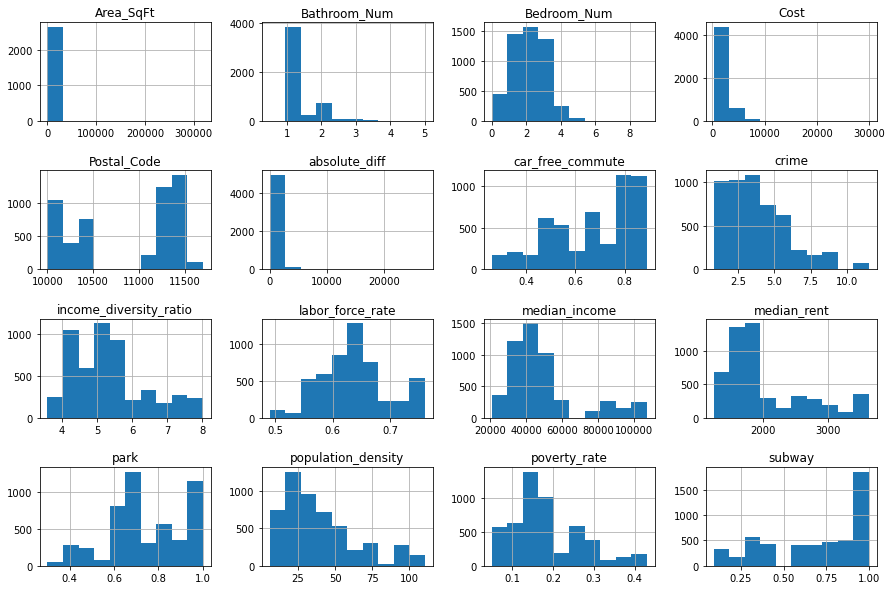

In [192]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

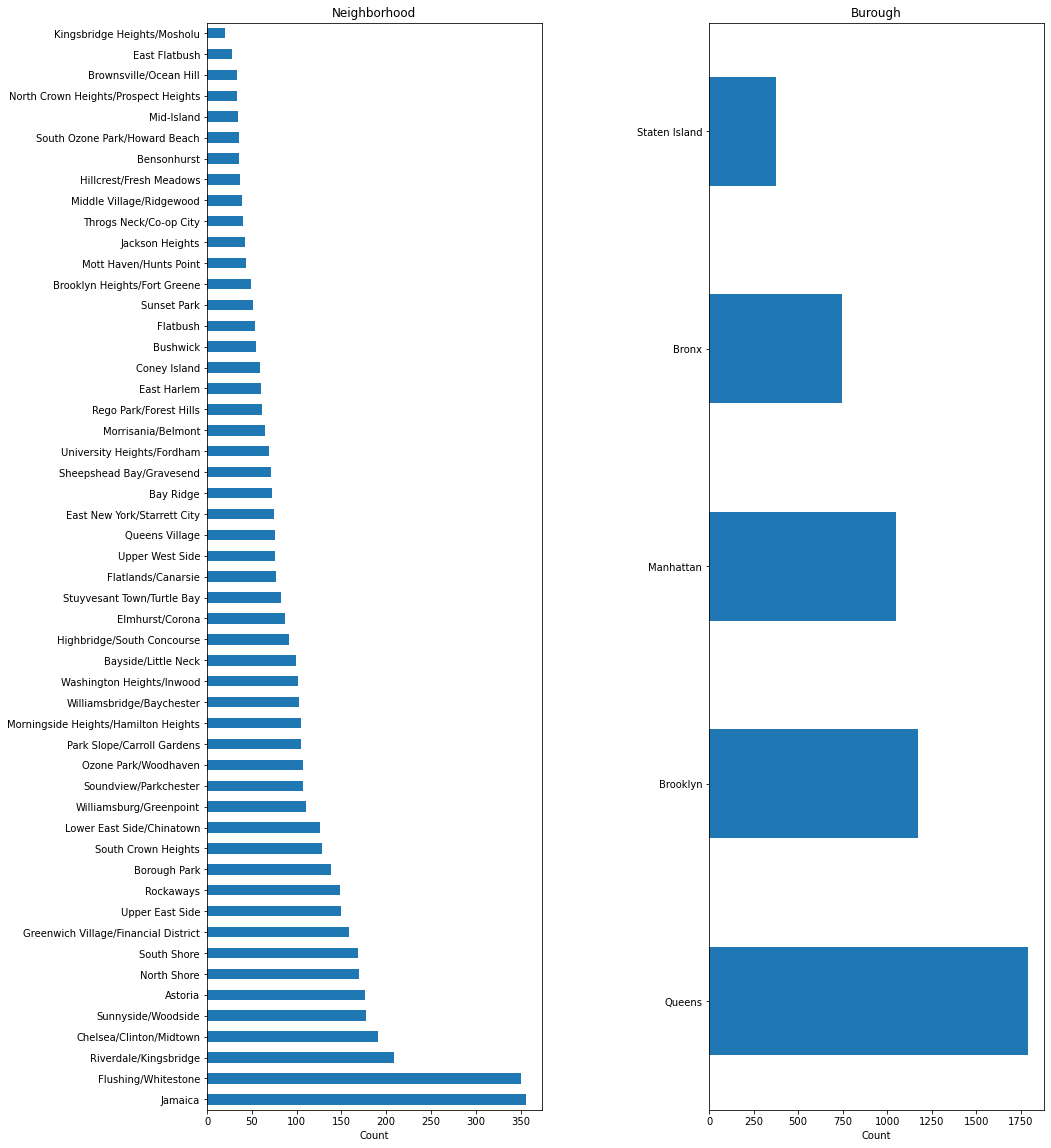

In [193]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,20))

df.Neighborhood.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Neighborhood')
ax[0].set_xlabel('Count')

df.boro_names.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('Burough')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace=0.5);

### 4. Median Rent Price - Comparing DataFrames

In [108]:
rent_med = df.groupby(['Neighborhood'])[['Cost','median_rent']].median()
rent_med.head()

,Cost,median_rent
Neighborhood,,
Astoria,2300.0,2125.10
Bay Ridge,2200.0,1678.72
Bayside/Little Neck,2295.0,1962.32
Bensonhurst,2125.0,1496.61
Borough Park,2174.5,1761.92


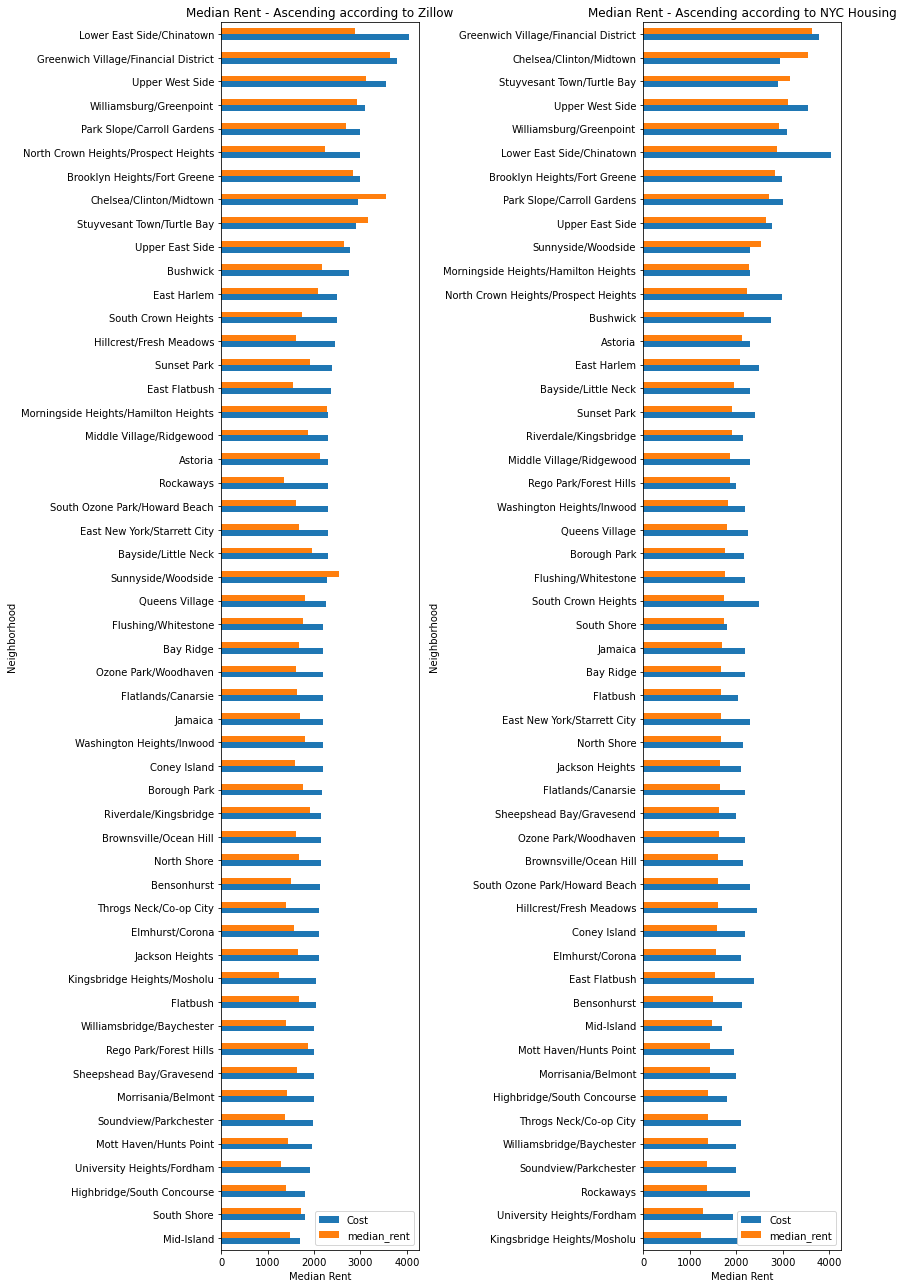

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 18))

rent_med.sort_values(by='Cost',ascending=True).plot(kind='barh', ax=ax[0])
ax[0].set_title('Median Rent - Ascending according to Zillow')
ax[0].set_xlabel('Median Rent')

rent_med.sort_values(by='median_rent',ascending=True).plot(kind='barh', ax=ax[1])
ax[1].set_title('Median Rent - Ascending according to NYC Housing')
ax[1].set_xlabel('Median Rent')

plt.subplots_adjust(wspace=0.3);
plt.tight_layout()

- Much better correlation between the median rent prices per Neighborhood of both datasets; therefore removing outliers improved the accuracy of the data

**I will add a column to see how the apartment listing compares to the median rent price.**

#### 4.1 Comparing Median Rent Price of Neighborhood to Rent Price

In [73]:
df['absolute_diff'] = abs(df.Cost-df.median_rent)

In [121]:
rent_med = df.groupby(['Neighborhood'])[['Cost','median_rent']].median()
rent_med['diff'] = abs(rent_med.Cost-rent_med.median_rent)
diff = rent_med.sort_values(by='diff', ascending=False)

diff.head()

,Cost,median_rent,diff
Neighborhood,,,
Lower East Side/Chinatown,4050.0,2878.79,1171.21
Rockaways,2300.0,1362.07,937.93
Hillcrest/Fresh Meadows,2450.0,1602.95,847.05
East Flatbush,2375.0,1538.30,836.70
Kingsbridge Heights/Mosholu,2050.0,1248.18,801.82


### 5. Distribution of Data by Unit Type

In [123]:
df.Unit_Type.unique()

array(['Apartment for rent', 'House for rent', 'Townhouse for rent',
       'Condo for rent', 'Co-op for rent'], dtype=object)

In [203]:
Unit_Type = df.groupby('boro_names')['Unit_Type'].value_counts()
Unit_Type

boro_names     Unit_Type         
Bronx          Apartment for rent     688
               House for rent          42
               Townhouse for rent      12
               Condo for rent           5
               Co-op for rent           1
Brooklyn       Apartment for rent    1127
               House for rent          28
               Townhouse for rent      18
               Condo for rent           2
Manhattan      Apartment for rent    1044
               Townhouse for rent       7
Queens         Apartment for rent    1467
               House for rent         233
               Townhouse for rent      46
               Condo for rent          45
               Co-op for rent           1
Staten Island  Apartment for rent     269
               House for rent          81
               Townhouse for rent      20
               Condo for rent           4
Name: Unit_Type, dtype: int64

------------

## 3. Relationship between variables

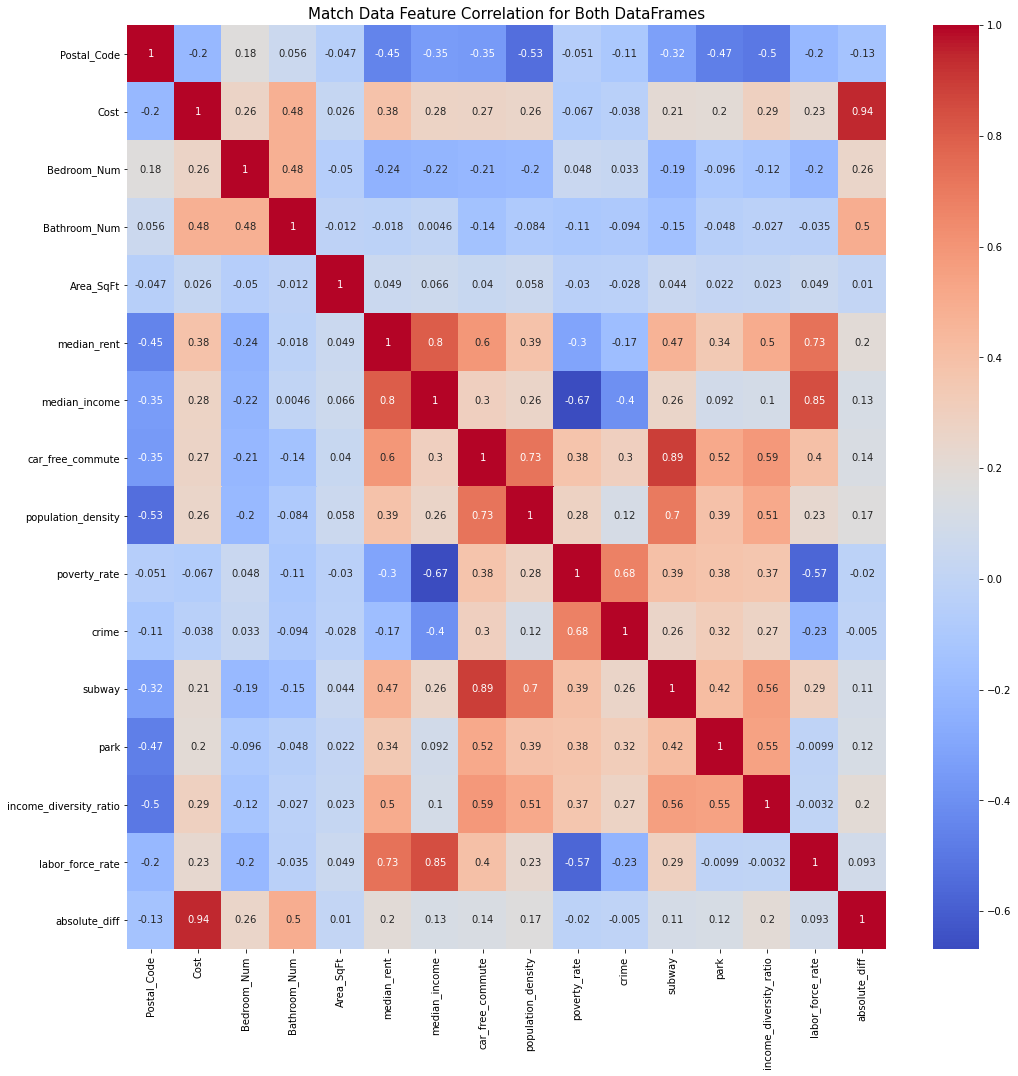

In [105]:
_ = plt.subplots(figsize=(17, 17))
_ = sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
_ = plt.title('Match Data Feature Correlation for Both DataFrames', fontsize=15)

**Strong Positive Correlations**
- Car Free Commute / Subway (0.89)
- Labor Force Rate / Median Income (0.85)
- Median Income / Median Rent (0.8)
- Population Density / Car Free Commute (0.73)

**Moderately Strong Negative Correlations**
- Poverty Rate / Median Income (-0.67)
- Labor Force Rate / Poverty Rate (-0.57)

### Conclusion- 

While reviewing the correlation matrix we can assume that the data is accurate as these correaltions make sense intuitively. 
- The strongest positive correlation is car free commute and subway; which would occur because as the people with more access to subway are more likely to opt for this option. 
- Median Income and Median Rent are also correlated because as one's income increases, they are more prone to live in a more expensive neighborhood. 


**Exploring a Moderately Strong Negative Correlation:**

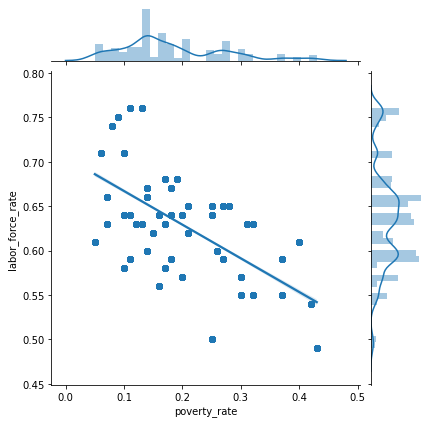

In [118]:
sns.jointplot(x='poverty_rate', y='labor_force_rate', data=df, kind="reg");

## 4. Scatterplots of numeric features against Rent Price

In [110]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Cost', data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel='Rent Price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [116]:
features = [x for x in df.columns if x not in ['Unit_Type','Address', 'Home_Type', 'Neighborhood', 'boro_names', 'Postal_Code']]

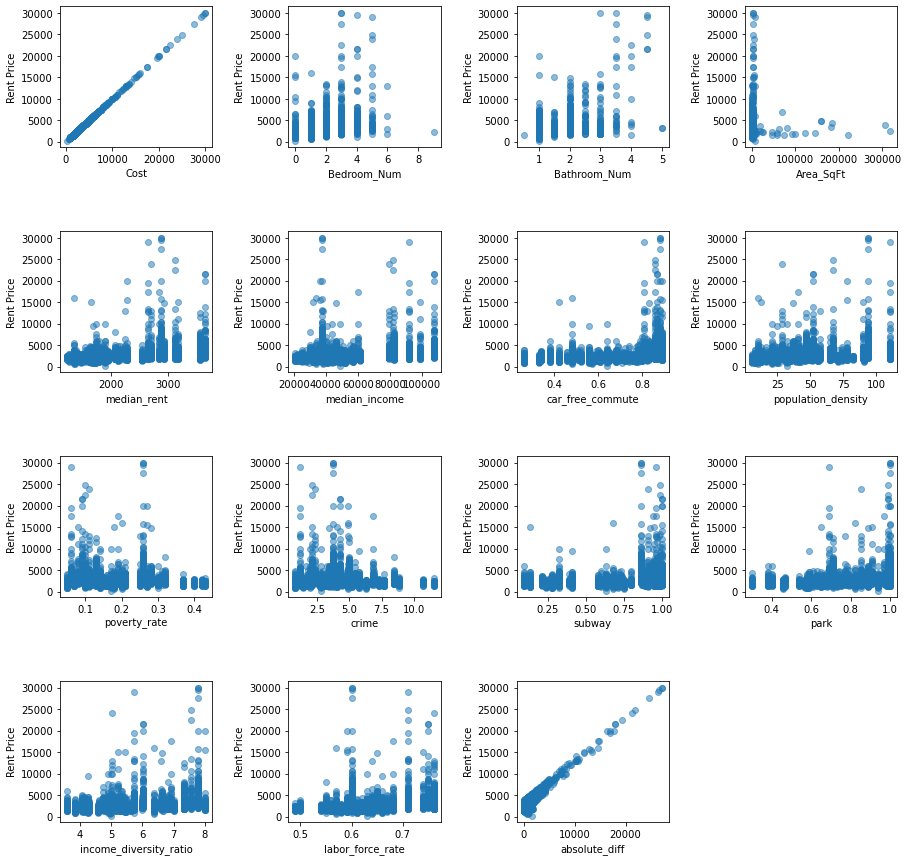

In [119]:
scatterplots(features, ncol=4, figsize=(15, 15))

## 5. Visualizing High Dimensional Data

### 5.1 Scaling the Data

In [156]:
# Removed NULL Values so that the data could scale
Numerical_Data = df.drop(['Unit_Type','Address', 'Home_Type', 'Neighborhood', 'boro_names', 'Postal_Code','Area_SqFt'], axis=1).dropna()

In [157]:
df_scaled = scale(Numerical_Data)
df_scaled = pd.DataFrame(df_scaled, columns=Numerical_Data.columns)
df_scaled.head()

,Cost,Bedroom_Num,Bathroom_Num,median_rent,median_income,car_free_commute,population_density,poverty_rate,crime,subway,park,income_diversity_ratio,labor_force_rate,absolute_diff
0,0.015841,0.970319,-0.493804,0.816575,0.291407,0.619861,-0.707256,-0.464346,-0.948980,0.696911,0.264466,-1.179949,0.566612,-0.466402
1,-0.789063,-1.787801,-0.493804,-0.111876,0.604132,-1.926270,-1.094497,-1.263477,-1.258376,-1.685885,-0.289917,-1.011503,-0.118034,-0.063154
2,-0.070399,-0.868428,-0.493804,2.419282,1.676391,1.256393,0.274078,-0.578507,0.507227,0.977240,-0.179040,1.861433,2.107067,0.158823
3,-0.156639,-1.787801,-0.493804,2.419282,1.676391,1.256393,0.274078,-0.578507,0.507227,0.977240,-0.179040,1.861433,2.107067,0.258737
4,1.884366,-0.868428,-0.493804,2.419282,1.676391,1.256393,0.274078,-0.578507,0.507227,0.977240,-0.179040,1.861433,2.107067,1.030650


In [161]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5071 entries, 0 to 5070
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cost                    5071 non-null   float64
 1   Bedroom_Num             5071 non-null   float64
 2   Bathroom_Num            5071 non-null   float64
 3   median_rent             5071 non-null   float64
 4   median_income           5071 non-null   float64
 5   car_free_commute        5071 non-null   float64
 6   population_density      5071 non-null   float64
 7   poverty_rate            5071 non-null   float64
 8   crime                   5071 non-null   float64
 9   subway                  5071 non-null   float64
 10  park                    5071 non-null   float64
 11  income_diversity_ratio  5071 non-null   float64
 12  labor_force_rate        5071 non-null   float64
 13  absolute_diff           5071 non-null   float64
dtypes: float64(14)
memory usage: 594.3 KB


In [162]:
df_scaled.std(ddof=0)

Cost                      1.0
Bedroom_Num               1.0
Bathroom_Num              1.0
median_rent               1.0
median_income             1.0
car_free_commute          1.0
population_density        1.0
poverty_rate              1.0
crime                     1.0
subway                    1.0
park                      1.0
income_diversity_ratio    1.0
labor_force_rate          1.0
absolute_diff             1.0
dtype: float64

Our data has scale appropriately as the standard deviation is 1

### 5.2 PCA Transformation

In [164]:
rent_pca = PCA().fit(df_scaled)

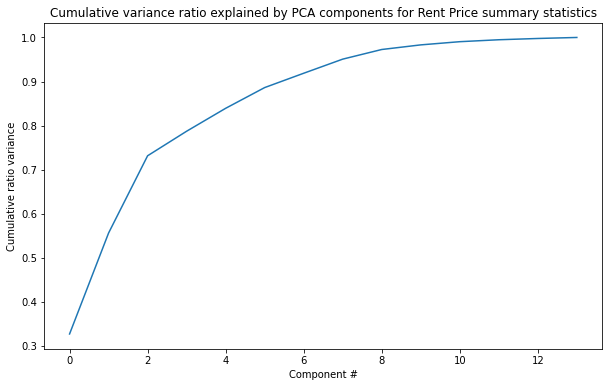

In [168]:
plt.subplots(figsize=(10, 6))
plt.plot(rent_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Rent Price summary statistics');

The first two components seem to account for over 70% of the variance, and the first four for over 80%.